In [2]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime as dt

import pandas as pd

from prophet import *
# from 

import pyarrow.parquet as pq


# from download import download

mpl.rcParams['figure.figsize'] = (24, 8)
mpl.rcParams['axes.grid'] = False

horizon = 365

from prophet.plot import *
import plotly.express as px

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ad_2.csv')

In [4]:
df['datetime'] =  pd.to_datetime(df['datetime'])

In [5]:
df.shape

(97176, 27)

In [6]:
col = 'temp'

df = df[[col , 'datetime']]
df['datetime'] =  pd.to_datetime(df['datetime'])
#-------
df = df.set_index('datetime')
df = df.resample('d').max()
df = df.reset_index()
#---------
df['ds'] = df['datetime']
df = df.rename({col : 'y'}, axis = 'columns')

<ipython-input-6-dc4cbbd67f74>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] =  pd.to_datetime(df['datetime'])


In [7]:
df

,datetime,y,ds
0,2012-01-01,32.1,2012-01-01
1,2012-01-02,33.5,2012-01-02
2,2012-01-03,33.4,2012-01-03
3,2012-01-04,33.7,2012-01-04
4,2012-01-05,34.7,2012-01-05
...,...,...,...
4044,2023-01-27,31.3,2023-01-27
4045,2023-01-28,32.0,2023-01-28
4046,2023-01-29,32.6,2023-01-29
4047,2023-01-30,32.0,2023-01-30


In [10]:
# Python
from prophet.diagnostics import cross_validation
# df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')


# Metrics are calculated over a rolling window of cross validation
# predictions, after sorting by horizon. Averaging is first done within each
# value of horizon, and then across horizons as needed to reach the window
# size. The size of that window (number of simulated forecast points) is
# determined by the rolling_window argument, which specifies a proportion of
# simulated forecast points to include in each window. rolling_window=0 will
# compute it separately for each horizon. The default of rolling_window=0.1
# will use 10% of the rows in df in each window. rolling_window=1 will
# compute the metric across all simulated forecast points. The results are
# set to the right edge of the window.

In [16]:
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []
horizons =[]
mses=[]
maes=[]
mapes=[]
mdapes=[]
smapes=[]
coverages=[]
  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, horizon='365 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    
    horizons.append(df_p['horizon'].values[0] , )
    rmses.append(df_p['rmse'].values[0] , )
    mses.append(df_p['mse'].values[0] , )
    maes.append(df_p['mae'].values[0] , )
    mapes.append(df_p['mape'].values[0] , )
    mdapes.append(df_p['mdape'].values[0] , )
    smapes.append(df_p['smape'].values[0] , )
    coverages.append(df_p['coverage'].values[0] , )


# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['horizon'] = horizons
tuning_results['rmse'] = rmses
tuning_results['mse'] = mses
tuning_results['mae'] = maes
tuning_results['mape'] = mapes
tuning_results['mdape'] = mdapes
tuning_results['smape'] = smapes
tuning_results['coverage'] = coverages

print(tuning_results)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1ca9h5h/9x50d6v9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1ca9h5h/jkpae1he.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64439', 'data', 'file=/tmp/tmpk1ca9h5h/9x50d6v9.json', 'init=/tmp/tmpk1ca9h5h/jkpae1he.json', 'output', 'file=/tmp/tmpk1ca9h5h/prophet_modeli4ddsfr9/prophet_model-20230301151602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:16:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:16:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 15 forecasts with cutoffs between 2015-02-02 00:00:00 and 2022-01-31 00:00:00
INFO:prophet:Applying in parallel with <concu

    changepoint_prior_scale  seasonality_prior_scale  horizon      rmse  \
0                     0.001                     0.01 365 days  2.433717   
1                     0.001                     0.10 365 days  2.449014   
2                     0.001                     1.00 365 days  2.440638   
3                     0.001                    10.00 365 days  2.441359   
4                     0.010                     0.01 365 days  2.705284   
5                     0.010                     0.10 365 days  2.700544   
6                     0.010                     1.00 365 days  2.692896   
7                     0.010                    10.00 365 days  2.692248   
8                     0.100                     0.01 365 days  3.608185   
9                     0.100                     0.10 365 days  3.508536   
10                    0.100                     1.00 365 days  3.487838   
11                    0.100                    10.00 365 days  3.499943   
12                    0.5

In [13]:
param_best = {
    'changepoint_prior_scale':0.001,
    'seasonality_prior_scale':0.01      
}

In [30]:
m_b = Prophet(
    **params
)
m_b.fit(df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1ca9h5h/a2lrp5ea.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpk1ca9h5h/yhj0iy3s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96808', 'data', 'file=/tmp/tmpk1ca9h5h/a2lrp5ea.json', 'init=/tmp/tmpk1ca9h5h/yhj0iy3s.json', 'output', 'file=/tmp/tmpk1ca9h5h/prophet_modeldan3hfyh/prophet_model-20230301152959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:29:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:30:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [31]:
future = m_b.make_future_dataframe(periods = 365)
forecast = m_b.predict(future)

In [32]:
from prophet.plot import *
import plotly.express as px

In [33]:
plot_plotly(m_b, forecast)

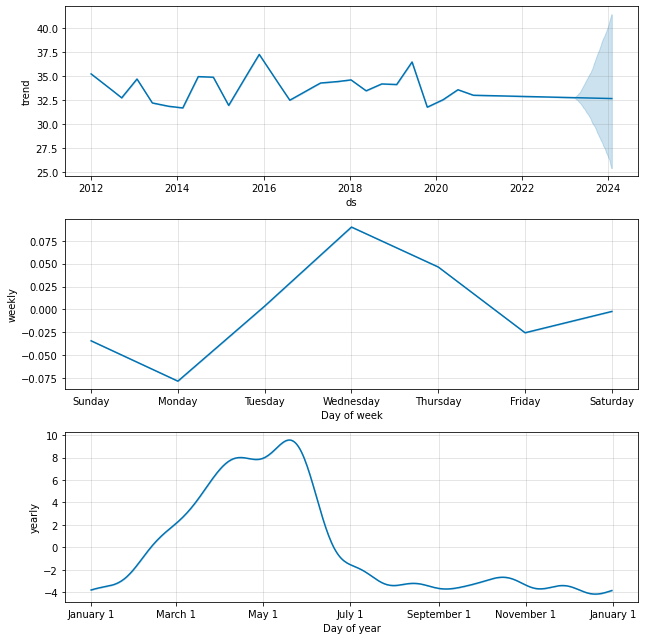

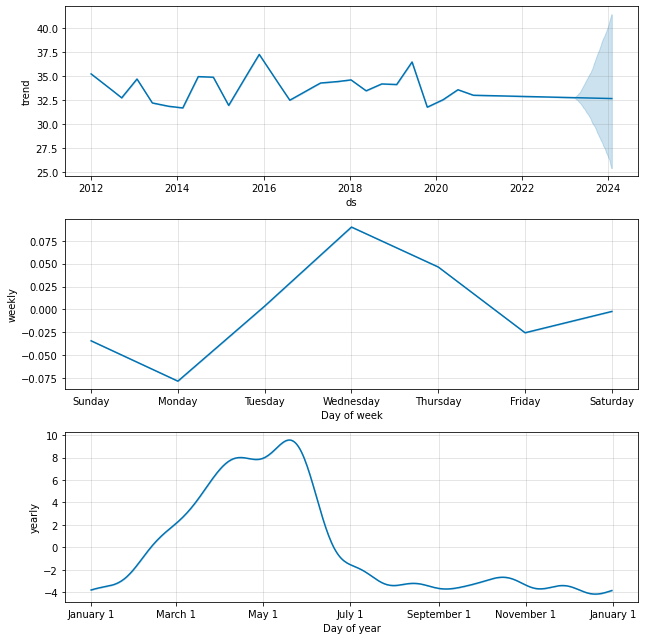

In [21]:
m.plot_components(forecast)

In [18]:
tuning_results

,changepoint_prior_scale,seasonality_prior_scale,horizon,rmse,mse,mae,mape,mdape,smape,coverage
0,0.001,0.01,365 days,2.433717,5.922978,1.880081,0.058329,0.043215,0.057029,0.778447
1,0.001,0.10,365 days,2.449014,5.997671,1.882632,0.058409,0.043369,0.057172,0.780457
2,0.001,1.00,365 days,2.440638,5.956716,1.874943,0.058132,0.043325,0.056924,0.781005
3,0.001,10.00,365 days,2.441359,5.960234,1.876432,0.058211,0.043373,0.056960,0.779178
4,0.010,0.01,365 days,2.705284,7.318564,2.124493,0.065348,0.050748,0.064281,0.699726
5,0.010,0.10,365 days,2.700544,7.292937,2.117257,0.065093,0.050992,0.064060,0.696804
6,0.010,1.00,365 days,2.692896,7.251689,2.108672,0.064861,0.050572,0.063759,0.701187
7,0.010,10.00,365 days,2.692248,7.248201,2.108521,0.064859,0.050507,0.063787,0.698630
8,0.100,0.01,365 days,3.608185,13.018998,2.691497,0.082112,0.058015,0.083071,0.708858
9,0.100,0.10,365 days,3.508536,12.309826,2.670565,0.081390,0.059279,0.081353,0.699543


In [19]:
tuning_results.to_csv('tuning_res.csv')

In [15]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,365 days,15.611937,3.951194,2.800572,0.085879,0.058402,0.087771,0.885662
